
# Задачі кластеризації та класифікації


<h2>Мета</h2>

Ознайомитись з різновидами моделей для задач кластеризації та класифікації, а також методами побудови та оцінки цих моделей. Після завершення цієї лабораторної роботи ви зможете:

* Використовувати прості моделі для задач кластеризації та класифікації
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі за допомогою підбору параметрів


<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачайте дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Виконайте кластеризацію по ВВП на душу населення та щільності населення.
2. Використайте метод ліктя для підбору оптимальної кількості кластерів.
3. Визначіть, який регіон домінує в кожному з кластерів.
4. Побудуйте кілька (3-5) моделей класифікації, що визначають регіон, до якого належить країна, по ознаках 'GDP per capita', 'Population', 'CO2 emission', 'Area'. Оцініть точність класифікації (використайте 20% загального набору в якості тестових даних).
5. Для однієї з моделей виконайте підбір параметра. Обгрунтуйте ваш вибір.

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Виконайте кластеризацію по ВВП на душу населення та щільності населення. </p>
</div>


Зчитую дані з файлу у датафрейм


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import mean_squared_error, r2_score, classification_report, silhouette_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from google.colab import drive
drive.mount('/content/drive')
filename = "/content/drive/My Drive/clean_data5.csv"
df = pd.read_csv(filename)
df.head()

Mounted at /content/drive


,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470,164.427660


Виділяю параметри для кластеризації

In [2]:
features = df[['GDP per capita', 'Population density']]
features

,GDP per capita,Population density
0,561.778746,53.083405
1,4124.982390,100.038296
2,3916.881571,17.048902
3,11834.745230,277.995000
4,36988.622030,164.427660
...,...,...
212,13445.593416,294.145714
213,2943.404534,756.074086
214,990.334774,52.245796
215,1269.573537,22.045136


Будую модель методом k середніх з кількістю кластерів 5

In [3]:
kmeans1 = KMeans(
    init='random',
    n_clusters=5,
    n_init=10,
    max_iter=300
)

kmeans1.fit(features)

KMeans(init='random', n_clusters=5, n_init=10)

<p>Отримані центри кластерів:</p>


In [4]:
kmeans1.cluster_centers_

array([[ 2826.77759139,   118.94059098],
       [12833.85598938,   578.38803864],
       [70801.76889125,  2646.54657044],
       [43104.7268005 ,   900.26897294],
       [25288.99915571,   371.88157383]])

<p>Масив із номерами кластерів для кожного рядка даних:</p>


In [5]:
kmeans1.labels_

array([0, 0, 0, 1, 3, 0, 1, 1, 0, 1, 3, 3, 0, 4, 4, 0, 1, 0, 3, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 4, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 4, 1, 3, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       3, 3, 1, 0, 0, 0, 3, 0, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 2,
       0, 0, 0, 0, 2, 1, 3, 4, 0, 3, 0, 0, 0, 0, 1, 4, 0, 4, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 4, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 3, 1, 3, 0, 1, 0, 4, 2, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 4, 4, 2, 1, 1, 0, 0, 3, 0, 4, 0, 0, 1, 0, 3, 1, 1, 4, 0, 0,
       0, 1, 4, 0, 1, 1, 1, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 3, 3, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
      dtype=int32)

<p>Візуалізую отримані кластери:</p>


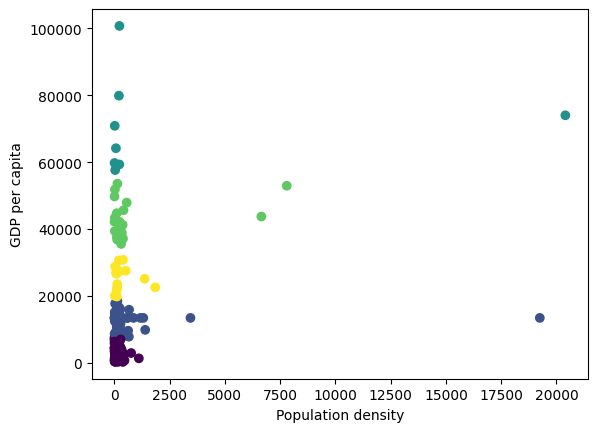

In [6]:
plt.xlabel('Population density')
plt.ylabel('GDP per capita')
plt.scatter(df[['Population density']], df[['GDP per capita']], c=kmeans1.labels_)
plt.show()

<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Використайте метод ліктя для підбору оптимальної кількості кластерів.</p>
</div>


Визначаю оптимальну кількість кластерів. Скористаюсь методом "ліктя". Для цього ініціалізую алгоритм k середніх кількістю кластерів від 1 до 10 і для кожної моделі рахую суму квадратів похибок (евклідових відстаней точок кластерів від відповідних центрів):

In [7]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}

sse = []
max_kernels = 10
for k in range(1, max_kernels + 1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

<p>Візуалізую отримані результати:</p>


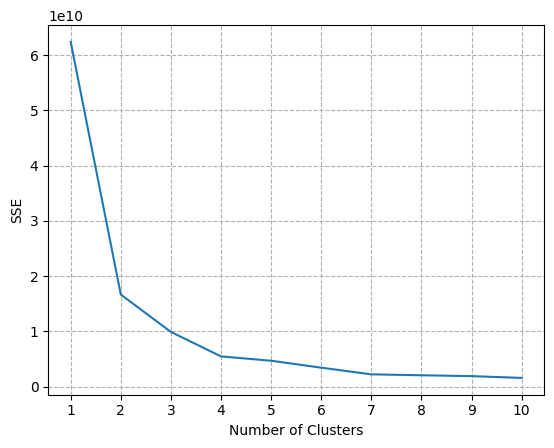

In [8]:
plt.plot(range(1, max_kernels + 1), sse)
plt.xticks(range(1, max_kernels + 1))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(linestyle='--')
plt.show()

Додатково розрахуємо коефіцієнти силуетів (silhouette coefficients) для визначення кращої кількості кластерів:

In [9]:
silhouette_coefficients = []

for k in range(2, max_kernels + 1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)

Візуалізуємо значення коефіцієнтів для різної кількості центрів:

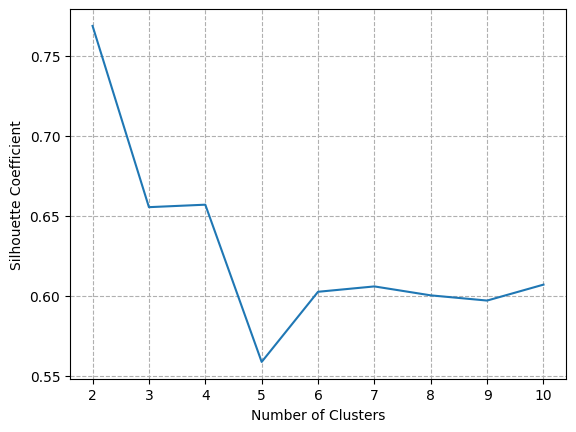

In [10]:
plt.plot(range(2, max_kernels + 1), silhouette_coefficients)
plt.xticks(range(2, max_kernels + 1))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(linestyle='--')
plt.show()

<p>Оптимальна кількість кластерів дорівнює 3. [Чому саме за цим графіком 3? (робив за аналогією з теорії, там було 4)]</p>
<p>Візуалізую для оптимальної кількості кластерів:</p>

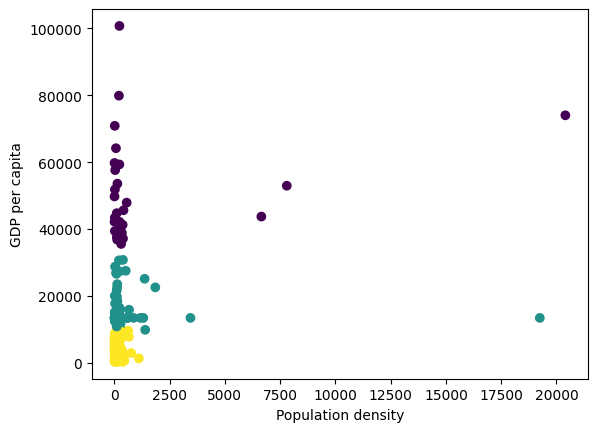

In [15]:
kmeans2 = KMeans(
    init='random',
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans2.fit(features)

plt.xlabel('Population density')
plt.ylabel('GDP per capita')
plt.scatter(df[['Population density']], df[['GDP per capita']], c=kmeans2.labels_)
plt.show()

<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Визначіть, який регіон домінує в кожному з кластерів.</p>
</div>


Додаю мітки кластерів в датафрейм

In [16]:
df['cluster'] = kmeans2.labels_
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density,cluster
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860,53.083405,2
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750,100.038296,2
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740,17.048902,2
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200,277.995000,1
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470,164.427660,0


In [18]:
print(df.columns)
print(df['cluster'].unique())
print(df['Region'].unique())
print(df.head())

Index(['Country Name', 'Region', 'GDP per capita', 'Population',
       'CO2 emission', 'Area', 'Population density', 'cluster'],
      dtype='object')
[2 1 0]
['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'East Asia & Pacific' 'Sub-Saharan Africa' 'Latin America & Caribbean'
 'North America']
     Country Name                      Region  GDP per capita  Population  \
0     Afghanistan                  South Asia      561.778746  34656032.0   
1         Albania       Europe & Central Asia     4124.982390   2876101.0   
2         Algeria  Middle East & North Africa     3916.881571  40606052.0   
3  American Samoa         East Asia & Pacific    11834.745230     55599.0   
4         Andorra       Europe & Central Asia    36988.622030     77281.0   

    CO2 emission     Area  Population density  cluster  
0    9809.225000   652860           53.083405        2  
1    5716.853000    28750          100.038296        2  
2  145400.217000  2381740           17.048902    

Визначаю домінуючий регіон для кожного кластера

In [19]:
grouped_df = df.groupby(['cluster', 'Region']).size().reset_index(name='counts')
dominant_regions = grouped_df.loc[grouped_df.groupby('cluster')['counts'].idxmax(), ['cluster', 'Region']]

for cluster, region in dominant_regions.values:
    print(f"Cluster: {cluster}\n\t Dominant Region: {region}")

Cluster: 0
	 Dominant Region: Europe & Central Asia
Cluster: 1
	 Dominant Region: Europe & Central Asia
Cluster: 2
	 Dominant Region: Sub-Saharan Africa


<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте кілька (3-5) моделей класифікації, що визначають регіон, до якого належить країна, по ознаках 'GDP per capita', 'Population', 'CO2 emission', 'Area'. Оцініть точність класифікації (використайте 20% загального набору в якості тестових даних).</p>
</div>


 Обираю потрібні ознаки:


In [20]:
all_features=pd.get_dummies(df[['GDP per capita', 'Population', 'CO2 emission', 'Area']])
all_features[['Region']] = df[['Region']]
all_features

,GDP per capita,Population,CO2 emission,Area,Region
0,561.778746,34656032.0,9809.225000,652860,South Asia
1,4124.982390,2876101.0,5716.853000,28750,Europe & Central Asia
2,3916.881571,40606052.0,145400.217000,2381740,Middle East & North Africa
3,11834.745230,55599.0,165114.116337,200,East Asia & Pacific
4,36988.622030,77281.0,462.042000,470,Europe & Central Asia
...,...,...,...,...,...
212,13445.593416,102951.0,165114.116337,350,Latin America & Caribbean
213,2943.404534,4551566.0,165114.116337,6020,Middle East & North Africa
214,990.334774,27584213.0,22698.730000,527970,Middle East & North Africa
215,1269.573537,16591390.0,4503.076000,752610,Sub-Saharan Africa


 Розділяю датасет на навчальну і тестову вибірки за допомогою функції <code>train_test_split()</code>:


In [21]:
df_train, df_test = train_test_split(
    all_features,
    test_size=0.2,
    random_state=1
)
df_train.head()

,GDP per capita,Population,CO2 emission,Area,Region
117,5237.147670,2081206.0,7510.016,25710,Europe & Central Asia
47,1534.973724,23695919.0,11045.004,322460,Sub-Saharan Africa
27,13445.593416,30661.0,179.683,150,Latin America & Caribbean
59,4223.584579,6344722.0,6285.238,21040,Latin America & Caribbean
40,13792.926050,17909754.0,82562.505,756096,Latin America & Caribbean


<p>Розміщую цільові дані - Region -  в окремому датафреймі:</p>

In [22]:
x_train = df_train[['GDP per capita', 'Population', 'CO2 emission', 'Area']]
y_train = df_train[['Region']]

x_test = df_test[['GDP per capita', 'Population', 'CO2 emission', 'Area']]
y_test = df_test[['Region']]

<h3>Навчання та тестування моделей:</h3>

Для навчання були обрані наступні методи:

- k-nearest neighbors;
- Support vector machines;
- Decision Tree Classifier;
- Random Forest Classifier;
- Extra Trees Classifier.

 <h3>Метод 1: k-nearest neighbors</h3>


Будую модель


In [23]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

Оцінюю точність

In [27]:
print('k-nearest neighbors mean accuracy = ', KNN_model.score(x_test, y_test))

k-nearest neighbors mean accuracy =  0.22727272727272727


 <h3>Метод 2: Support vector machines</h3>


Будую модель


In [25]:
SVC_model = SVC()
SVC_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

Оцінюю точність

In [28]:
print('Support vector machines mean accuracy = ', SVC_model.score(x_test, y_test))

Support vector machines mean accuracy =  0.3181818181818182


 <h3>Метод 3: Decision Tree Classifier</h3>


Будую модель


In [34]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

Оцінюю точність

In [35]:
print('Decision Tree Classifier mean accuracy = ', decision_tree.score(x_test, y_test))

Decision Tree Classifier mean accuracy =  0.5227272727272727


 <h3>Метод 4: Random Forest Classifier</h3>


Будую модель


In [36]:
randomforest = RandomForestClassifier(max_depth=5)
randomforest.fit(x_train, y_train)

<ipython-input-36-d0afa267809d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(x_train, y_train)


RandomForestClassifier(max_depth=5)

Оцінюю точність

In [37]:
print('Random Forest Classifier mean accuracy = ', randomforest.score(x_test, y_test))

Random Forest Classifier mean accuracy =  0.5227272727272727


 <h3>Метод 5: Extra Trees Classifier</h3>


Будую модель


In [38]:
extratrees = ExtraTreesClassifier(max_depth=5)
extratrees.fit(x_train, y_train)

<ipython-input-38-0fa63d06422f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extratrees.fit(x_train, y_train)


ExtraTreesClassifier(max_depth=5)

Оцінюю точність

In [44]:
print('Extra Trees Classifier mean accuracy = ', extratrees.score(x_test, y_test))

Extra Trees Classifier mean accuracy =  0.5454545454545454


<h4>Висновок</h4>

<p>Порівнюючи всі моделі, роблю висновок, що <b>модель Extra Trees Classifier є найкращою</b>. </p>

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Для однієї з моделей виконайте підбір параметра. Обгрунтуйте ваш вибір.</p>
</div>


<p>Скористаюсь методом "ліктя" для визначення максимальної висоти дерева методу Extra Trees Classifier.</p>
<p>Для цього ініціалізую алгоритм з параметром max_depth від 1 до 30 і для кожної моделі порахую mean accuracy:</p>

In [45]:
accur = []
max_kernels = 30
for k in range(1, max_kernels + 1):
    extratrees = ExtraTreesClassifier(max_depth=k)
    extratrees.fit(x_train, y_train)
    accur.append(extratrees.score(x_test, y_test))

<ipython-input-45-17d1e3d67156>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extratrees.fit(x_train, y_train)
<ipython-input-45-17d1e3d67156>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extratrees.fit(x_train, y_train)
<ipython-input-45-17d1e3d67156>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extratrees.fit(x_train, y_train)
<ipython-input-45-17d1e3d67156>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extratrees.fit(x_train, y_train)
<ipython-input-45-17d1e3d67156>:5: DataConversionWarning: A column-vector y was passed when a 1d arr

 Отримані показники якості візуалізую на графіку:


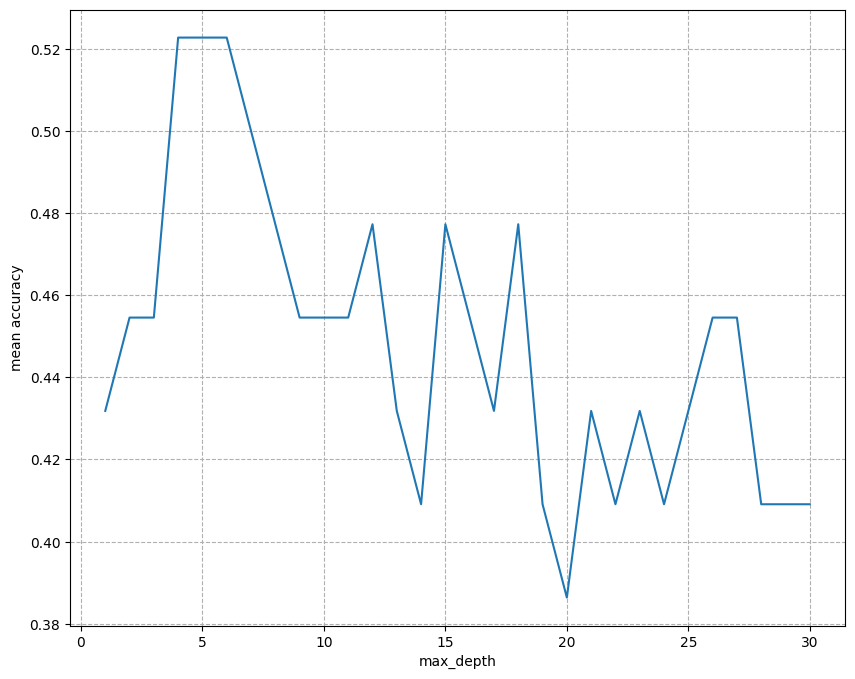

In [46]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_kernels + 1), accur)
plt.xticks(range(0, max_kernels + 1,5))
plt.xlabel('max_depth')
plt.ylabel('mean accuracy')
plt.grid(linestyle='--')
plt.show()

З графіку бачу, що найкраще значення параметра знаходиться в межах від 4 до 6 , тому що після цих меж значення параметра різко падають.


<a name="task6"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Використовуючи файл <a href="https://drive.google.com/file/d/1gxqzPQNlqrwrJI3zstMsvHQAbsdMPe-2/view?usp=drive_link" target="_blank">Data5.csv</a>:

1. Визначити кластер країн з найкращим розвитком (кластеризувати по Ie, Iec, Is; для k-середніх використати 4 кластера). Побудувати центри кластерів.
2. Провести кластеризацію по Сql, порахувати скільки країн потрапило в різні кластери, якщо порівнювати з п1.</p>
</div>


Згідно з методологією вимірювання сталого розвитку країн, сталий розвиток оцінюється за допомогою відповідного індексу у просторі трьох вимірів: економічного (Іес), екологічного (Іе) і соціально-інституціонального (Is). Цей індекс є вектором, норма якого визначає рівень сталого розвитку, а його просторове положення в системі координат (Iec,Ie,Is) характеризує міру «гармонійності» цього розвитку.

<details><summary>Натисніть тут, щоб побачити підказку до першого завдання</summary>

```python
# Зчитуємо заданий набір даних, зразу коригуючи
df = pd.read_csv(
    'Data5.csv', encoding='windows-1251', sep=';', decimal=','
).rename(columns={'Unnamed: 0': 'Country'})

df

```

</details>



In [47]:
filename1 = "/content/drive/My Drive/Data5.csv"
df1 = pd.read_csv(filename1, encoding='windows-1251', sep=';', decimal=',').rename(columns={'Unnamed: 0': 'Country'})

df1.head()

,Country,ISO,UA,Cql,Ie,Iec,Is
0,Albania,ALB,Албанія,0.973924,0.605348,0.538673,0.510113
1,Algeria,DZA,Алжир,0.782134,0.587219,0.348159,0.497986
2,Angola,AGO,Ангола,0.372344,0.274394,0.332117,0.346907
3,Argentina,ARG,Аргентина,0.883830,0.699685,0.281995,0.518820
4,Armenia,ARM,Вірменія,1.016499,0.718327,0.535648,0.486498


<details><summary>Натисніть тут, щоб побачити підказку до другого завдання</summary>

Номери кластерів для першого і другого методів кластеризації зовсім не обовязково співпадатимуть. Щоб знайти відповідність, подивіться в які кластери з другого методу потрапляють центри кластерів з першого.

Порахувати скільки країн потрапило в різні кластери можна з використанням матриці невідповідностей (як аргументи поставти номери кластерів для першого і другого методів кластеризації).

</details>

In [48]:
def analyze_cluster(df, features, cluster_name):
    kmeans = KMeans(n_clusters=4, random_state=42)
    df[cluster_name] = kmeans.fit_predict(df[features])

    print(f"Centroids for the {cluster_name} Cluster:")
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
    print(centroids)

    cluster_means = df.groupby(cluster_name)[features].mean()
    best_cluster = cluster_means.mean(axis=1).idxmax()
    print(f"\nThe cluster showing the highest development in terms of {cluster_name} is: {best_cluster}, with a mean value of: {kmeans.cluster_centers_[best_cluster].mean()}")

    return df

In [49]:
df1 = analyze_cluster(df1, ['Ie', 'Iec', 'Is'], 'Development')
df1 = analyze_cluster(df1, ['Cql'], 'Cql')

different_clusters = df1['Development'] != df1['Cql']
num_countries_diff = different_clusters.sum()
print(f"\nThe number of countries that fell into different clusters when comparing Development and Cql clusters is: {num_countries_diff}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroids for the Development Cluster:
         Ie       Iec        Is
0  0.768535  0.668493  0.639633
1  0.500625  0.435454  0.474901
2  0.263738  0.397639  0.405894
3  0.670252  0.511467  0.525704

The cluster showing the highest development in terms of Development is: 0, with a mean value of: 0.6922202270444444
Centroids for the Cql Cluster:
        Cql
0  0.788049
1  1.065493
2  0.473827
3  1.361576

The cluster showing the highest development in terms of Cql is: 3, with a mean value of: 1.361575531862069

The number of countries that fell into different clusters when comparing Development and Cql clusters is: 104



<h2>Виконав студент групи ІП-23 <br> Востріков Любомир</h2>
